In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN
import random
from random import sample
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,GridSearchCV
from sklearn import model_selection

In [2]:
df=pd.read_csv("C:/Users/Arun/Downloads/aps_failure_training_set.csv")


In [124]:
test_df=pd.read_csv("C:/Users/Arun/Downloads/aps_failure_test_set.csv")

# EDA for Training Data:

In [67]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
#converting Class to numericals
df['class']=df['class'].map({'neg':0,'pos':1})

In [4]:
#removing and replacing na with np.NaN:
df.replace(to_replace='na',value=np.NaN,inplace=True)

In [7]:
df.shape

(60000, 162)

In [6]:
df=df.dropna(axis=1,thresh=36000) #Dropping column which don't have atleast 60% of data or 40% of NaN

In [68]:
x1=df.drop(['class'],1)
y1=df['class']

In [69]:
#imputation:
from sklearn.preprocessing import Imputer
impute_median = Imputer(missing_values= np.nan, strategy='median')
train_data = pd.DataFrame(impute_median.fit_transform(x1),columns=x1.columns)

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [70]:
train_data['class']=y1

In [71]:
x2=train_data.drop(['class'],1)
y2=train_data['class']

# EDA for Test Data

In [125]:
#converting Class to numericals
test_df['class']=test_df['class'].map({'neg':0,'pos':1})

In [126]:
#removing and replacing na with np.NaN:
test_df.replace(to_replace='na',value=np.NaN,inplace=True)

In [130]:
test_df.shape

(16000, 162)

In [128]:
test_df=test_df.dropna(axis=1,thresh=9600) #Dropping column which don't have atleast 60% of data or 40% of NaN

In [129]:
test_df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,20,12,0,0,0,0,0,2682,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,68,40,0,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,212,112,0,0,0,0,0,199486,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,1010,936,0,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,156,140,0,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [131]:
test_x1=test_df.drop(['class'],1)
test_y1=test_df['class']

In [132]:
#imputation:
from sklearn.preprocessing import Imputer
test_impute_median = Imputer(missing_values= np.nan, strategy='median')
test_data = pd.DataFrame(test_impute_median.fit_transform(test_x1),columns=test_x1.columns)

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [133]:
test_data['class']=test_y1

In [142]:
test_x2=test_data.drop(['class'],1)
test_y2=test_data['class']

#Till now the EDA (replacing Na with np.NaN, removing columns that dont even have 60% of data and Imputing median to the null values) is done

# Oversampling

In [80]:
xresampled, yresampled = SMOTE().fit_resample(x2, y2)

In [81]:
df1=pd.DataFrame(xresampled,columns=x2.columns)

In [82]:
df1['class']=yresampled

In [83]:
df1.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0,0
1,33058.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0,0
2,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0,0
3,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0,0
4,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0,0


# RandomSampling

In [84]:
df_list=df1.values.tolist()

df_random=random.sample(df_list, 65000)

df_ran=pd.DataFrame(df_random,columns=df1.columns)

df_ran['class'].value_counts()

df_ran['class']=df_ran['class'].astype('int')

df_ran['class']=df_ran['class'].astype('category')

df_ran['class'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [85]:
df_ran.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,1.453503e+06,121.69587,4454.332697,0.0,0.0,0.0,96417.219211,2.014968e+06,1.571938e+07,3.394476e+07,...,2.880788e+06,6.442178e+06,9.850810e+06,2.327246e+07,1.377192e+07,616204.323380,104.588962,0.0,0.0,1
1,2.840000e+02,42.00000,38.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,6.095400e+04,...,7.660000e+02,1.918000e+03,2.002000e+03,1.344000e+03,2.738000e+03,26.000000,0.000000,0.0,0.0,0
2,2.246449e+05,3391.68333,126.000000,0.0,0.0,0.0,0.000000,4.136778e+02,7.891209e+04,1.024618e+06,...,1.274080e+06,2.796571e+06,2.041267e+06,1.136138e+06,5.727362e+05,303867.676021,531.884356,0.0,0.0,1
3,7.476400e+04,1508.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,3.214000e+03,...,4.684020e+05,1.409286e+06,8.793860e+05,2.144100e+05,8.179000e+04,28678.000000,1670.000000,0.0,0.0,0
4,3.020000e+04,152.00000,126.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,1.100000e+02,...,2.553980e+05,4.645720e+05,1.852660e+05,3.281200e+04,6.578000e+03,1502.000000,0.000000,0.0,0.0,0


In [86]:
df_ran['class'].value_counts()

1    32558
0    32442
Name: class, dtype: int64

In [87]:
x3=df_ran.drop(['class'],1)
y3=df_ran['class']

In [88]:
sc=StandardScaler()
x3=sc.fit_transform(x3)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x3,y3,test_size=0.2,random_state=0)

# Applying PCA to the Train and test data

In [91]:
pca=PCA(n_components=2)
xtrain1=pca.fit_transform(xtrain)
xtest1=pca.transform(xtest)

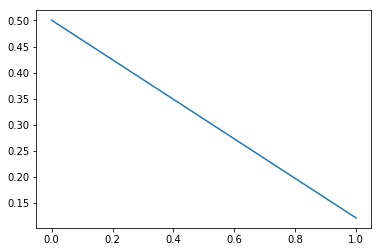

In [51]:
plt.plot(pca.explained_variance_ratio_)

# Model Instantiation:

In [33]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()
rf=RandomForestClassifier()

# Tuning the model

In [34]:
params={'max_depth':np.arange(1,20),'criterion':['entropy','gini']}
gs=GridSearchCV(dt,params,cv=5,scoring='recall')
gs.fit(x3,y3)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 17}

In [100]:
dt_reg=DecisionTreeClassifier(criterion='entropy',max_depth=17,random_state=0)
lr_reg=LogisticRegression(penalty='l1',random_state=0)

In [92]:
xtrain1

array([[-5.81047646, -0.3176856 ],
       [-2.30529426, -0.958524  ],
       [ 0.89581366,  4.76740156],
       ...,
       [-5.48104202, -0.24155158],
       [-5.47105114, -0.34906232],
       [-5.86093084, -0.39241344]])

In [96]:
x4=x3
y4=y3

In [ ]:
pca=PCA(n_components=2)
xtrain1=pca.fit_transform(x4)
#xtest1=pca.transform(xtest)

# With PCA

In [63]:
xtest1.shape

(633, 2)

In [101]:
tc=[]
roc_auc=[]
from sklearn.metrics import roc_curve, auc
kf=KFold(n_splits=10,shuffle=True,random_state=25)
for name, model in zip(['dt','dt_reg','lR','Logistic_Reg','RF'],
                      [dt,dt_reg,lr,lr_reg,rf]):
    for train,test in kf.split(x4,y4):
        xtrain1,xtest1=x4[train,:],x4[test,:]
        ytrain1,ytest1=y4[train],y4[test]
        pca=PCA(n_components=2)
        xtrain1=pca.fit_transform(xtrain1)
        model.fit(xtrain1,ytrain1)
        xtest1=pca.transform(xtest1)
        ypred_model=model.predict(xtest1)
        conf1=metrics.confusion_matrix(ytest1,ypred_model)
        fp=conf1[0,1]
        fn=conf1[1,0]
        total_cost=(10*fp)+(500*fn)
        acc=metrics.accuracy_score(ytest1,ypred_model)
        fpr,tpr,_=roc_curve(ytest1,ypred_model)
    tc.append([name,total_cost,acc,auc(fpr,tpr)])
print(tc)

[['dt', 124280, 0.9273846153846154, 0.9273830730918147], ['dt_reg', 92580, 0.9401538461538461, 0.9401563797041912], ['lR', 169640, 0.9306153846153846, 0.9305942459055133], ['Logistic_Reg', 169140, 0.9307692307692308, 0.9307481867922127], ['RF', 93040, 0.9481538461538461, 0.9481510809566224]]


In [109]:
xtrain1.shape

(58500, 2)

In [ ]:
#Notable Models for training data- Dt-reg, Random Forest

# Checking with Test Data

In [102]:
#Scaling the test data
test_x2=sc.transform(test_x2)

In [103]:
test_x2=pca.transform(test_x2)

In [104]:
test_x2.shape

(16000, 2)

In [105]:
dt_pca=DecisionTreeClassifier()
lr_pca=LogisticRegression()
rf_pca=RandomForestClassifier()
dt_reg_pca=DecisionTreeClassifier(criterion='entropy',max_depth=17,random_state=0)
lr_reg_pca=LogisticRegression(penalty='l2',random_state=0)

In [143]:
test_x2.shape

(16000, 161)

In [137]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [149]:
tc1=[]
roc_auc1=[]
test_x3=pca.transform(test_x2)
for name1, model1 in zip(['dt','dt_reg','lR','Logistic_Reg','RF'],[dt,dt_reg,lr,lr_reg,rf]):
    
    ypred_model1=model1.predict(test_x3)
    conf2=metrics.confusion_matrix(test_y2,ypred_model1)
    fp1=conf2[0,1]
    fn1=conf2[1,0]
    total_cost1=(10*fp1)+(500*fn1)
    acc1=metrics.accuracy_score(test_y2,ypred_model1)
    fpr1,tpr1,_=roc_curve(test_y2,ypred_model1)
    tc1.append([name1,total_cost1,acc1,auc(fpr1,tpr1)])
print(tc1)

[['dt', 187520, 0.9764375, 0.499936], ['dt_reg', 187520, 0.9764375, 0.499936], ['lR', 131960, 0.181375, 0.5782613333333334], ['Logistic_Reg', 131960, 0.181375, 0.5782613333333334], ['RF', 187520, 0.9764375, 0.499936]]


In [112]:
test_x2.shape

(16000, 161)

In [111]:
test_y2.shape

(16000,)

# Random Samping from test data

In [150]:
df7=pd.DataFrame(test_x2,columns=test_x1.columns)
df7['class']=test_y2

In [153]:
#since rf is not good: requires more training
df_list1=df7.values.tolist()

df_random1=random.sample(df_list1,11000)

df_ran1=pd.DataFrame(df_random1,columns=df1.columns)


In [157]:
df_ran1['class'].value_counts()

0.0    10746
1.0      254
Name: class, dtype: int64

In [158]:
df_ran1['class']=df_ran1['class'].astype('int')

df_ran1['class']=df_ran1['class'].astype('category')

df_ran1['class'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [159]:
x_train_ran=df_ran1.drop(['class'],1)
y_train_ran=df_ran1['class']

In [160]:
x_train_ran=sc.fit_transform(x_train_ran)

In [161]:
xtrain2=np.vstack((xtrain,x_train_ran))

In [194]:
xtrain.shape

(52000, 161)

In [173]:
xtrain2.shape

(63000, 161)

In [170]:
y_train_ran.shape

(11000,)

In [174]:
ytrain2=np.concatenate((ytrain,y_train_ran))

In [175]:
ytrain2.shape

(63000,)

In [184]:
dt_bag=BaggingClassifier(base_estimator=dt_reg,n_estimators=15,random_state=0)

In [183]:
gbs=GradientBoostingClassifier(n_estimators=100)

In [197]:
tc3=[]
roc_auc3=[]
from sklearn.metrics import roc_curve, auc
kf3=KFold(n_splits=10,shuffle=True,random_state=30)
for name1, model1 in zip(['dt','dt_reg','lR','Logistic_Reg','RF','GBS','dt_bag','Stacked'],
                      [dt,dt_reg,lr,lr_reg,rf,gbs,dt_bag,stacked]):
    for train,test in kf3.split(xtrain2,ytrain2):
        xtrain3,xtest3=xtrain2[train,:],xtrain2[test,:]
        ytrain3,ytest3=ytrain2[train],ytrain2[test]
        pca=PCA(n_components=2)
        xtrain3=pca.fit_transform(xtrain3)
        model1.fit(xtrain3,ytrain3)
        xtest3=pca.transform(xtest3)
        ypred_model3=model1.predict(xtest3)
        conf3=metrics.confusion_matrix(ytest3,ypred_model3)
        fp3=conf3[0,1]
        fn3=conf3[1,0]
        total_cost3=(10*fp3)+(500*fn3)
        acc3=metrics.accuracy_score(ytest3,ypred_model3)
        fpr3,tpr3,_=roc_curve(ytest3,ypred_model3)
    tc3.append([name1,total_cost3,acc3,auc(fpr3,tpr3)])
print(tc3)

[['dt', 193770, 0.8876190476190476, 0.8838359634761976], ['dt_reg', 157050, 0.9026984126984127, 0.9004686622430105], ['lR', 310840, 0.8649206349206349, 0.8527710966000096], ['Logistic_Reg', 310840, 0.8649206349206349, 0.8527710966000096], ['RF', 145070, 0.913968253968254, 0.9113909628354364], ['GBS', 150930, 0.9065079365079365, 0.9043626774506851], ['dt_bag', 126290, 0.9165079365079365, 0.9154209595265536], ['Stacked', 119710, 0.9198412698412698, 0.9189477217126579]]


In [186]:
dt_bag.n_features_

2

In [188]:
test_x3=pca.transform(test_x2)

In [189]:
test_x3.shape

(16000, 2)

In [198]:
ypred_dt_bag=stacked.predict(test_x3)
confusion=metrics.confusion_matrix(test_y2,ypred_dt_bag)
confusion

array([[ 2528, 13097],
       [    1,   374]], dtype=int64)

In [196]:
from sklearn.ensemble import VotingClassifier
stacked=VotingClassifier(estimators= [('RF',rf),('baggeddt',dt_bag),('Gboost',gbs)],voting='soft')

# Top Picks:

In [200]:
results=pd.DataFrame({'Model':['Stacked','Bagged Decision Tree','Random Forest'],'AUC':['91%','91%','91%'],'Total_cost':['119710','126290','145070']})
results

,Model,AUC,Total_cost
0,Stacked,91%,119710
1,Bagged Decision Tree,91%,126290
2,Random Forest,91%,145070


## Among the top picks stacked model is the best because True Negative(that is missing one truck having APS problem is very less) and FP is relatively low. But solving this dataset without PCA is more good.